In [25]:
"""we will import all data here and launch all functionality"""
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

In [26]:
# Convert balanced csv into dataframe and seperate labels
DATASET_PATH = "/Users/connormaclachlan/Desktop/CS433_Project/Code/audio_features2.csv"
df = pd.read_csv(DATASET_PATH)
data = df.iloc[:,:-1]
labels = df.iloc[:,-1]

# Binarize labels
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
labels = lb.transform(labels)
labels = labels.ravel()

data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.460546,0.019600,2963.884687,3267.005972,5470.882196,0.072772,-367.00760,145.05531,-39.509342,9.740074,...,-6.537854,-9.973751,-1.440740,-5.966642,-0.763765,-11.182472,-3.167860,-5.512184,-4.245675,-9.684337
1,0.466253,0.014279,2683.911773,3257.335666,5035.989139,0.059365,-397.97410,148.78825,-29.725275,12.238016,...,-7.775922,-9.570081,-1.629141,-5.858627,-0.050287,-9.834495,-3.972230,-5.280860,-4.880746,-8.733951
2,0.489474,0.009028,3021.577717,3810.189311,6278.326559,0.060115,-461.45007,137.25908,-10.904320,15.882215,...,-8.320246,-9.588968,-2.252445,-5.581845,-0.747251,-7.970168,-3.635025,-5.040414,-4.510477,-7.133467
3,0.486911,0.009545,3229.718116,3864.640276,6606.776386,0.069307,-461.58685,133.97969,-14.545082,24.910967,...,-7.770606,-10.215846,-3.263660,-7.869680,-1.856623,-10.158086,-3.120182,-5.020992,-2.269630,-7.375402
4,0.455949,0.014331,3086.336202,3451.406631,5734.066831,0.074854,-416.32126,133.45125,-15.054738,31.790266,...,-9.761721,-12.843019,-3.643779,-6.995357,-3.861711,-10.737380,-3.649080,-4.974201,-1.522852,-8.856704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,0.412818,0.066892,2583.068619,2829.326169,5163.795975,0.060236,-333.78262,144.71512,-20.789537,11.582300,...,-8.846725,-1.896972,-3.274629,-3.990192,-1.307747,-0.528529,-1.292468,-3.600915,0.689428,-2.756658
5908,0.395530,0.073642,2424.784135,2810.715089,4816.930970,0.053438,-331.97443,149.60684,-23.136524,7.226769,...,-7.704117,-0.982102,-3.566548,-3.882155,-1.297153,-0.719066,-2.619748,-3.978990,0.434549,-2.585578
5909,0.393038,0.068612,2226.744955,2723.591431,4161.055770,0.048795,-334.36398,156.39316,-23.255356,-3.817101,...,-7.001995,0.186833,-2.866827,-2.730880,-0.201203,-0.480000,-3.587965,-4.461579,-0.619438,-2.696462
5910,0.407273,0.064328,2268.316346,2813.686815,4415.420109,0.048171,-345.40338,153.21498,-16.308151,-1.320045,...,-7.911846,0.151382,-3.383205,-3.434818,0.375495,0.492073,-2.429903,-3.093830,-0.295001,-3.339307


In [27]:
# Convert data into tensorflow dataset
def convertToDataset(data, labels):
    return tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(data), tf.data.Dataset.from_tensor_slices(labels))

# Process dataset
def processData(data, labels):
    data = tf.abs(data)
    data = tf.expand_dims(data, axis=1)
    return data, labels

In [28]:
# Split data into training and testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.10, random_state=42)

trainDataset = convertToDataset(X_train, y_train)
testDataset = convertToDataset(X_test, y_test)

In [29]:
trainDataset.as_numpy_iterator().next()

(array([ 4.34771500e-01,  2.88258340e-02,  2.95657240e+03,  3.12244336e+03,
         5.69613706e+03,  7.52296692e-02, -3.32747860e+02,  1.42060130e+02,
        -5.10173840e+01,  2.65516720e+01, -2.30403400e+01,  1.31221510e+01,
        -4.83686160e+00, -1.63952080e+01, -5.59854100e+00, -1.61675110e+01,
        -1.58248260e+00, -1.81260410e+01, -1.98251720e+00, -2.50885060e+00,
        -8.38363600e+00, -1.18850960e+00, -7.47049760e+00,  3.05572150e-01,
        -5.17679900e+00, -4.52124500e+00]),
 1)

In [30]:
X_train.shape

(4138, 26)

In [31]:
# Data processing
trainDataset = trainDataset.map(processData)
trainDataset = trainDataset.cache()
trainDataset = trainDataset.batch(64)
trainDataset = trainDataset.prefetch(32)

testDataset = testDataset.map(processData)
testDataset = testDataset.cache()
testDataset = testDataset.batch(64)
testDataset = testDataset.prefetch(32)

X_val = abs(X_val)

In [32]:
# Hyperparameters
opt = optimizers.Adam(learning_rate=0.001)
epochs = 100

In [33]:
# Define the NN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(26,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=opt, loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainDataset, epochs=epochs)

# Evaluate the model
test_loss, test_acc = model.evaluate(testDataset)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

Epoch 1/100
65/65 [==============================] - 1s 4ms/step - loss: 16.2093 - accuracy: 0.7199
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 1.7680 - accuracy: 0.8185
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8726
Epoch 4/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3530 - accuracy: 0.8842
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8898
Epoch 6/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8978
Epoch 7/100
65/65 [==============================] - 0s 7ms/step - loss: 0.3244 - accuracy: 0.9036
Epoch 8/100
65/65 [==============================] - 0s 7ms/step - loss: 0.3236 - accuracy: 0.9058
Epoch 9/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3324 - accuracy: 0.9024
Epoch 10/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3285 - accuracy: 0.9050
Epoch 11

6/6 [==============================] - 0s 3ms/step


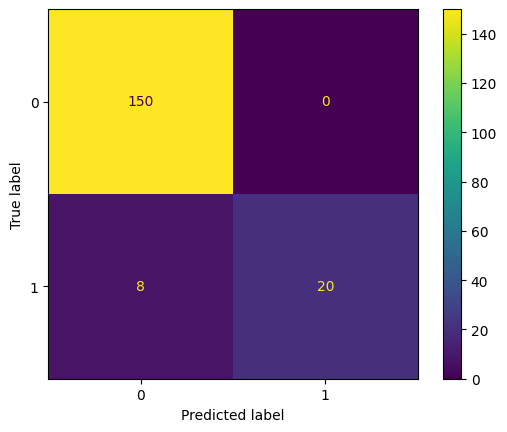

In [34]:
# Model given validation data to make prediction
predicted = model.predict(np.array(X_val))
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_val)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [35]:
# Validation percentage
predictPerc = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1])*100
print(f"Prediction Accuracy: {predictPerc}%")

Prediction Accuracy: 95.50561797752809%
